<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/FLk1plus_mix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the fragment size distribution between Flk1+ cells and unsorted mixture cells in Etv2 induced EB differentiation and MEF reprogramming
by Wuming Gong


In [1]:
start_time <- Sys.time()

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  "BSgenome.Mmusculus.UCSC.mm10", 'TxDb.Mmusculus.UCSC.mm10.knownGene',
  "dplyr", 
  'motifmatchr',
  'cccd',
  'patchwork'
)

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'motifmatchr', 'cccd', 'patchwork'

also installing the dependencies ‘formatR’, ‘rjson’, ‘filelock’, ‘lambda.r’, ‘futile.options’, ‘plyr’, ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘GenomicAlignments’, ‘restfulr’, ‘plogr’, ‘BiocFileCache’, ‘png’, ‘futile.logger’, ‘snow’, ‘BH’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘BiocGenerics’, ‘rtracklayer’, ‘matrixStats’, ‘XVector’, ‘RSQLite’, ‘RCurl’, ‘BiocIO’, ‘biomaRt’, ‘Biobase’, ‘KEGGREST’, ‘BiocParallel’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘MatrixGenerics’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘GenomeInfoDbData’, ‘BSgenome’, ‘Ge

In [7]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [8]:
install_github("GreenleafLab/chromVARmotifs")

pillar    (1.6.2  -> 1.6.3 ) [CRAN]
stringi   (1.7.4  -> 1.7.5 ) [CRAN]
openssl   (1.4.3  -> 1.4.5 ) [CRAN]
mime      (0.11   -> 0.12  ) [CRAN]
cpp11     (0.3.1  -> 0.4.0 ) [CRAN]
lifecycle (1.0.0  -> 1.0.1 ) [CRAN]
hms       (1.1.0  -> 1.1.1 ) [CRAN]
tibble    (3.1.4  -> 3.1.5 ) [CRAN]
digest    (0.6.27 -> 0.6.28) [CRAN]
readr     (2.0.1  -> 2.0.2 ) [CRAN]


Installing 10 packages: pillar, stringi, openssl, mime, cpp11, lifecycle, hms, tibble, digest, readr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpxKO5yk/remotes4e3ef3f713/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [131]:
install_github('gongx030/seatac', quiet = FALSE)
devtools::reload(pkgload::inst("seatac"))
library(seatac)


✔  checking for file ‘/tmp/RtmpxKO5yk/remotes4e5d595981/gongx030-seatac-382243e/DESCRIPTION’ (872ms)
─  preparing ‘seatac’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘seatac_0.3.33.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

ℹ Reloading attached seatac


Attaching package: ‘seatac’


The following object is masked from ‘package:tfdatasets’:

    fit


The following object is masked from ‘package:stats’:

    predict




### Load R packages

In [10]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(cccd)
library(igraph)
library(Matrix)
library(ggplot2)
library(patchwork)
library(reshape2)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi


Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    co

## Parameters

In [11]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
)

## Load data

In [76]:
remote_bam_files = c(
  EB_Dox_D25 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25.bam',
  EB_Dox_D25_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam',
  MEF_Dox_D7 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7.bam',
  MEF_Dox_D7_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_bam_files <- gsub('https://.+?/', './', remote_bam_files)

In [77]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (f in remote_bed_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_bed_files <- gsub('https://.+?/', './', remote_bed_files)

## Read V-plots

In [78]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [79]:
sprintf('number of aggregated ATAC-seq peaks: %d', length(gr0)) %>% message()

number of aggregated ATAC-seq peaks: 98030



## Read the fragment size distribution

In [137]:
df <- do.call('rbind', lapply(1:length(local_bam_files), function(i){
  d <- read_fragment_size_profile(filename = local_bam_files[i], genome = BSgenome.Mmusculus.UCSC.mm10, fragment_size_range = c(0L, 2000L), fragment_size_interval = 1L)
  cbind(d, sample = names(local_bam_files)[i])
}))

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



Warning message:
“Removed 587 row(s) containing missing values (geom_path).”


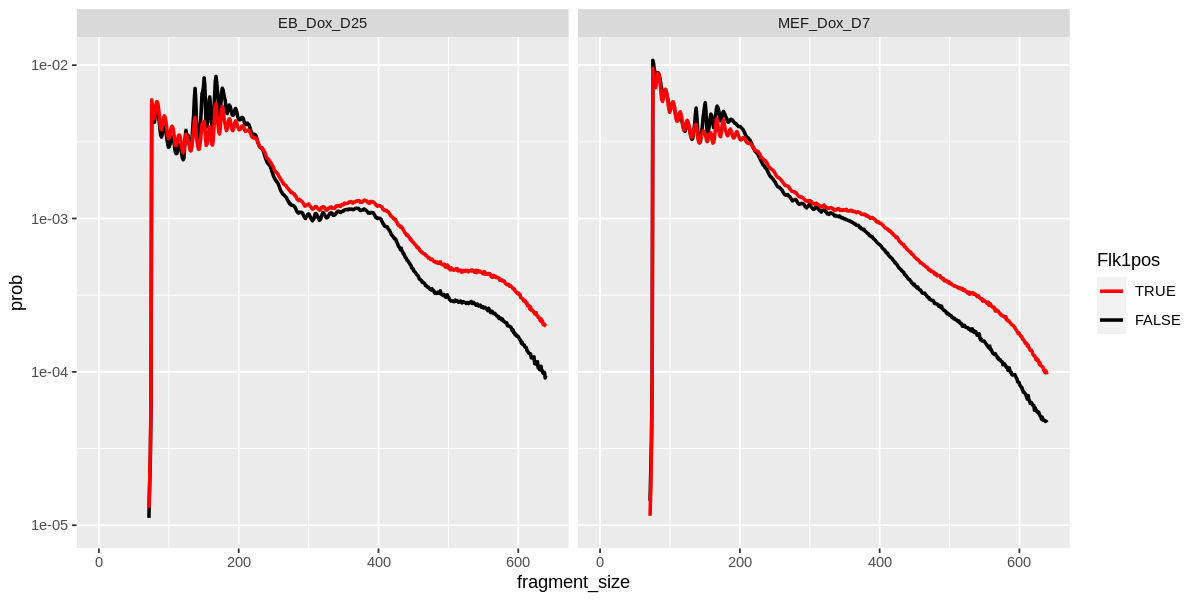

In [138]:
options(repr.plot.width = 10, repr.plot.height = 5)
df %>% 
  mutate(group = gsub('_Flk1pos', '', sample), Flk1pos = grepl('Flk1pos', sample)) %>%
  filter(prob > 1e-5) %>%
  ggplot(aes(x = fragment_size, y = prob, color = Flk1pos)) +
    geom_line(size = 1) +
    facet_grid(. ~ group) +
    scale_y_log10() +
    xlim(0, 640L) +
    scale_color_manual(values = c('TRUE' = 'red', 'FALSE' = 'black'))

## Identify Etv2 motifs

In [107]:
data('homer_pwms') # 321 TF motifs from Homer database
Etv2_canonical <- homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']
gr <- matchMotifs(
  Etv2_canonical,
  reduce(gr0),
  genome = BSgenome.Mmusculus.UCSC.mm10,
  out = 'positions'
)[[1]]

In [108]:
sprintf('number of Etv2 motifs: %d', length(gr)) %>% message()

number of Etv2 motifs: 27066



In [109]:
gr <- resize(gr, fix = 'center', width = ARGS[['block_size']])

## Read Vplots

In [110]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



## Plot Vplots

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)



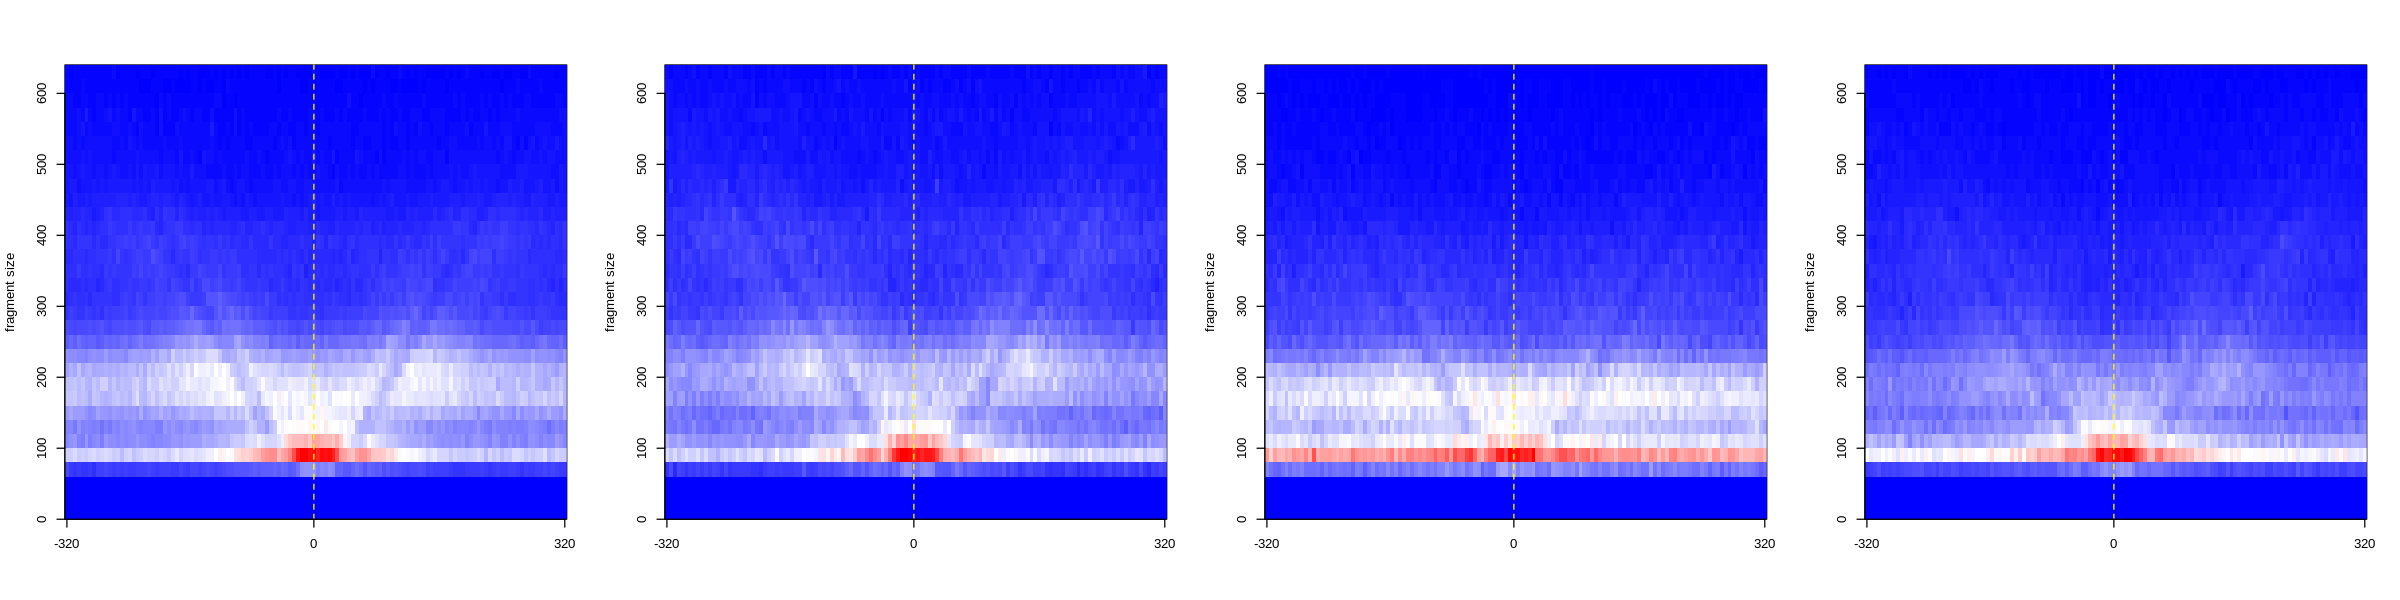

In [118]:
options(repr.plot.width = 20, repr.plot.height = 5)
par(mfrow = c(1, 4))
vplot(x[rowData(x)$batch == 'EB_Dox_D25'])
vplot(x[rowData(x)$batch == 'EB_Dox_D25_Flk1pos'])
vplot(x[rowData(x)$batch == 'MEF_Dox_D7'])
vplot(x[rowData(x)$batch == 'MEF_Dox_D7_Flk1pos'])

## SessionInfo

In [139]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] seatac_0.3.33                            
 [2] reshape2_1.4.4                           
 [3] patchwork_1.1.1                          
 [4] ggplot2_3.3.5                            
 [5] Matrix_1.3-4                             
 [6] cccd_1

In [ ]:
Sys.time() - start_time

Time difference of 1.716737 hours